In [1]:
# GridWorld plot utilities

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 6

def plot_world(World):
    # ------------------
    Ly, Lx = World.shape

    fig, ax = plt.subplots()
    im = ax.imshow(World, cmap=plt.get_cmap("Spectral"))
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(Lx))
    ax.set_yticks(np.arange(Ly))

    goal = np.where(np.logical_or( World > 0.0, World < -1.0))
    blocks = np.where(World == -1.0)
    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j,goal[1]==i).any():
                text = ax.text(i,j, 'G{}'.format(int(World[j,i])), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                 text = ax.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                pass
    plt.show()
    # -------------------

    

def plot_world_values(World, Values):
    # ------------------
    Ly, Lx = World.shape

    fig, (ax, ax2) = plt.subplots(1,2)
    im = ax.imshow(World, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax.set_xticks(np.arange(Lx))
    ax.set_yticks(np.arange(Ly))

    goal = np.where(np.logical_or( World > 0.0, World < -1.0))
    blocks = np.where(World == -1.0)
    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j,goal[1]==i).any():
                text = ax.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                pass

    im2 = ax2.imshow(Values, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax2.set_xticks(np.arange(Lx))
    ax2.set_yticks(np.arange(Ly))

    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j, goal[1]==i).any():
                text = ax2.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax2.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                text = ax2.text(i, j, '{:.2f}'.format(Values[j, i]), ha="center", va="center", color="black")
                
                
    plt.show()
    # -------------------

    

def plot_world_values_policy(World, Values, Policy):
    # ------------------
    Ly, Lx = World.shape

    fig, ((ax), (ax2), (ax3)) = plt.subplots(3,1)
    im = ax.imshow(World, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax.set_xticks(np.arange(Lx))
    ax.set_yticks(np.arange(Ly))

    goal = np.where(np.logical_or( World > 0.0, World < -1.0))
    blocks = np.where(World == -1.0)
    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j,goal[1]==i).any():
                text = ax.text(i,j, 'G-{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                pass

    im2 = ax2.imshow(Values, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax2.set_xticks(np.arange(Lx))
    ax2.set_yticks(np.arange(Ly))

    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j, goal[1]==i).any():
                text = ax2.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
                text = ax3.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax2.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
                text = ax3.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                text = ax2.text(i, j, '{:.2f}'.format(Values[j, i]), ha="center", va="center", color="black")
    
    im3 = ax3.imshow(Values, cmap=plt.get_cmap("Spectral"))
    X = np.arange(Lx)
    Y = np.arange(Ly)

    for gx, gy in zip(goal[0],goal[1]) :
        Policy[gx,gy] = 0
        
    U, V = Policy[:,:,1], -Policy[:,:,0]
    q = ax3.quiver(X, Y, U, V, color="black")

    plt.show()
    # -------------------
    

In [2]:
# Basic SARSA utilities

class SARSA_TDControl_for_GridWorldEnvs():
    def __init__(self,
                 gridWorld_RL_model,
                 space_size,
                 actions,
                 n_episodes,
                 gamma=1,
                 epsilon=0.1,
                 lr_v=0.01):
        """
        Calculates optimal policy using in-policy Temporal Difference control
        Evaluates Q-value for (S,A) pairs and trajectories length.
        """
        # model to evaluate (remember that it might have stocastic action results)
        self.gridWorld_RL_model = gridWorld_RL_model

        # system properties
        self.space_size = space_size # as tuple
        self.actions = actions
        self.action_size = len(self.actions)

        # number of trajectories used to evaluate Q
        self.n_episodes = n_episodes

        # parameters
        self.gamma = gamma      # discount factor
        self.epsilon = epsilon  # exploration parameter
        self.lr_v = lr_v        # learning rate
        
        # Quality initialization
        self.Qvalues_init = np.zeros( (*self.space_size, self.action_size) )  # zero initialization

        # where to save results: Q^, returns and trajectories length during the learning
        self.Qvalues = np.zeros( (*self.space_size, self.action_size) )
        self.trajectories_length = np.zeros(self.n_episodes)

    # -------------------   
    def single_step_update(self, s, a, r, new_s, new_a, done):
        """
        Uses a single step to update the values, using Temporal Difference for Q values.
        Employs the EXPERIENCED action in the new state  <- Q(S_new, A_new).
        """
        if done:
            deltaQ = (r + 0 - self.Qvalues[ (*s, a) ])
        else:
            deltaQ = (r +
                      self.gamma * self.Qvalues[ (*new_s, new_a) ] 
                                 - self.Qvalues[ (*    s,     a) ])
            
        self.Qvalues[ (*s, a) ] += self.lr_v * deltaQ
        
    # ---------------------
    def get_action_epsilon_greedy(self, s, eps):
        """
        Chooses action at random using an epsilon-greedy policy wrt the current Q(s,a).
        """
        ran = np.random.rand()  # random var. between [0,1]
        
        if (ran < eps):
            # probability is uniform for all actions!
            prob_actions = np.ones(self.action_size) / self.action_size 
        
        else:
            # I find the best Qvalue
            best_value = np.max(self.Qvalues[ (*s,) ])
            
            # There could be actions with equal value! 
            best_actions = ( self.Qvalues[ (*s,) ] == best_value )


            # best_actions is 
            # *True* if the value is equal to the best (possibly ties) --> So more than one action can be marked as best if ties occurs
            # *False* if the action is suboptimal
            prob_actions = best_actions / np.sum(best_actions)  # If more then one best-action exist --> I took one of them randomly
            
        # take one action from the array of actions with the probabilities as defined above.
        a = np.random.choice(self.action_size, p=prob_actions)
        return a 
        
    def greedy_policy(self):
        # Just added for convenience. This is the one you use once you converged to Q*
        greedy_pol = np.argmax(self.Qvalues, axis = 2)
        return greedy_pol
    
    # ---------------------
    def all_episodes_update(self):

        # Reinitialize SARSA if alredy been used
        import copy
        self.Qvalues = copy.copy(self.Qvalues_init)
        self.trajectories_length = np.zeros(self.n_episodes)

        # Run over all episodes
        for i in range(self.n_episodes):
            done = False

            self.gridWorld_RL_model.reset()
            
            s = self.gridWorld_RL_model.current_state
            a = self.get_action_epsilon_greedy(s, self.epsilon)
            act = self.actions[a]
            
            while not done:
                # Evolve one step
                new_s, r, done = self.gridWorld_RL_model.step(act)

                # Keeps track of performance for each episode
                self.trajectories_length[i] += 1

                # Choose new action...
                new_a = self.get_action_epsilon_greedy(new_s, self.epsilon)  # its index...
                act = self.actions[new_a]                                    # and the action itself

                # Single update with (S, A, R', S', A')
                self.single_step_update(s, a, r, new_s, new_a, done)

                a = new_a
                s = new_s

    # ---------------------
    def get_trajectories_length(self):
        return self.trajectories_length


# The GridWorld Environment

Environment is based on the first grid world environment found in [Policy invariance under reward transformations: Theory and application to reward shaping](https://people.eecs.berkeley.edu/~russell/papers/icml99-shaping.pdf), a paper of Andrew Y. Ng et al.

It is a $10 \times 10$ world with start and (single) goal in opposite corners:

- **State:** (S) Position in the world S=(i,j)
- **Action:** (A) Discrete. Up, Down, Left, Right. A $\in \big[ [1,0],[-1,0],[0,1],[0,-1] \big]$
- **Transition:** ($p$) Stocastic. I can move left, right, up, down (but not outside the world)
$$
p(S'|S,A) =
\begin{cases}
0.8     & \text{if S'==S+A and S' is allowed} \\
0.2     & \text{random action}
\end{cases}
$$
- **Reward:** (R) All steps have a $-1$ penalty (I want the path to be the shortest possible!)
- **End of episode:** The episode ends only when I reach the end goal.

We'll solve the problem using "SARSA" algorithm

In [3]:
# GridWorld as matrix class
def new_world(Lx, Ly, Nblocks, goal, rewards):
    '''
    Lx: horizontal size of the worls
    Ly: vertical size of the worls
    Nblocks: number of 'obstacles' in the grid
    goal: set of states that gives 'rewards'
    rewards: rewards that you get when you pass in the 'goal' states  
    '''
    assert len(goal) == len(rewards)
    World = np.zeros((Ly,Lx))

    # adding walls to the gridWorld
    blockX = np.random.randint(Lx, size = Nblocks)
    blockY = np.random.randint(Ly, size = Nblocks)
    World[blockY, blockX] = -1
    for g, r in zip(goal, rewards):
        World[g] = r
    return World


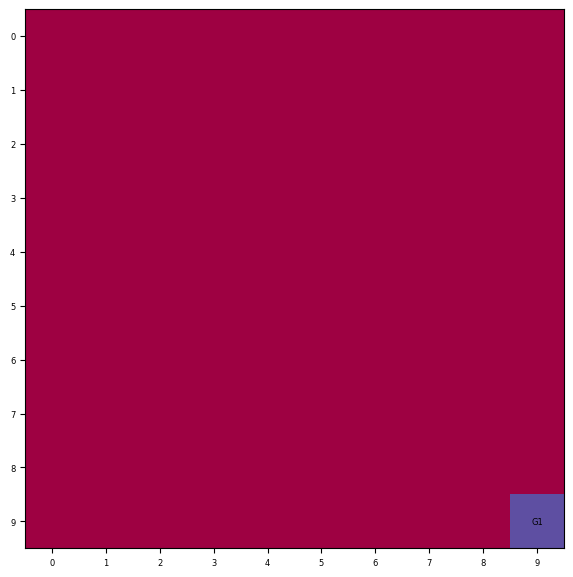

In [4]:
# Recreate the world mentioned above
Lx = 10
Ly = 10
Nblocks= 0
starting_tile = [0,0]
goal_tile = [(Ly-1,Lx-1)]

# The list of actions I can take: 
#actions =           [Down,   Up,  Right,Left]
actions  = np.array([[1,0],[-1,0],[0,1],[0,-1]])

russel_World_1 = new_world(Lx, Ly, Nblocks, goal_tile, [1])

plot_world(russel_World_1)


In [5]:
# GridWorld as RL model

class GridWorldEnv():
    def __init__(self, World, start, end, stocastic=False, p=0.1):
        """
        Defines a GridWorld with start and end sites.
        """
        # Reads the World shape
        self.Ly, self.Lx = World.shape
        self.World = World
        
        # Reads the position of start and end
        self.start = start
        self.end = end
        
        # Keeps track of current state
        self.current_state = self.start
        
        # Keeps track of terminal state
        self.done = False

        # Stocasticity
        self.stocastic = stocastic
        self.p = p
        
    def reset(self):
        """
        Resets the GridWorld to the starting position.
        """
        # Reset the environment to initial state
        self.current_state = self.start
        self.done = False
        
    def step(self, A):
        """
        Evolves the environment given action A and current state.
        """
        # Check if action A is in proper set
        actions = np.array([[1,0],[0,1],[-1,0],[0,-1]])
        assert A in actions
        S = self.current_state
        S_new = S + A

        # But if the environment is stocastic, I might not move in the direction I want
        if self.stocastic and np.random.rand() < self.p:
            a = np.random.choice(len(actions))
            A = actions[a]
            S_new = S + A

        # Always a penalty for moving -> want to find the shortest path!
        reward = -1

        # If I go out of the world I stay still
        if ( ((S_new[0] == self.Ly) or np.any(S_new == -1)) or (S_new[1] == self.Lx)):
            S_new = S
        # If I find a wall (reward == -1) I stay still
        elif self.World[ (*S_new,) ] == -1:
            S_new = S
        # If I find a penalty tile
        elif self.World[ (*S_new,) ] < -1:
            reward = self.World[ (*S_new,) ]
        elif np.all(S_new == self.end):
            self.done = True         
        
        # Save in memory new position
        self.current_state = S_new
            
        return S_new, reward, self.done    
        
    def render(self):
        """
        Does nothing.
        """
        pass
    

In [6]:
n_episodes = 500
epsilon = 0.1
gamma = 1
alpha = 0.02
indipendent_runs = 40

# Initialize
russel_World_1_as_RL_model = GridWorldEnv(russel_World_1, starting_tile, goal_tile, stocastic=True, p=0.2)
sarsa_for_vanilla_world = SARSA_TDControl_for_GridWorldEnvs(russel_World_1_as_RL_model, (Ly,Lx), actions, n_episodes, gamma, epsilon, alpha)

# Leanring results averaged over many runs
averaged_trajectories_length = np.zeros(n_episodes)
for _ in range(indipendent_runs):
    sarsa_for_vanilla_world.all_episodes_update()  # SARSA learning
    averaged_trajectories_length += sarsa_for_vanilla_world.get_trajectories_length()

averaged_trajectories_length /= (indipendent_runs)

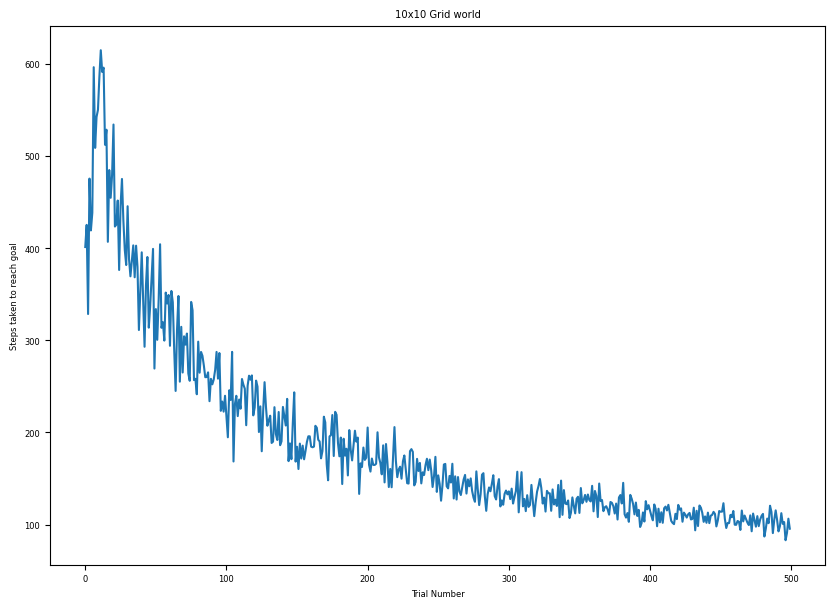

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel("Trial Number")
ax.set_ylabel("Steps taken to reach goal")
ax.set_title("10x10 Grid world")

ax.plot(averaged_trajectories_length,
        label="No shaping")


# Tweaking the learning

We want to learn a policy for some Markov Decision Process (MDP) $M = (S, A, p, \gamma, R)$.  

How can we help our learning algorithm?  
By giving it additional "shaping" rewards $F\colon S\times A\times S \to \mathbb{R}$

Thus
$$
M = (S, A, p, \gamma, R) \Longrightarrow M' = (S, A, p, \gamma, R')
$$
where $R'(s,a,s') = R(s,a,s') + F(s,a,s')$

In [8]:
# SARSA with shaping and initialization utilities 

class SARSA_TDControl_for_GridWorldEnvs():
    def __init__(self,
                 gridWorld_RL_model,
                 space_size,
                 actions,
                 n_episodes,
                 gamma=1,
                 epsilon=0.1,
                 lr_v=0.01,
                 F = lambda s, a, new_s: 0,
                 Qvalues_init = None):
        """
        Calculates optimal policy using in-policy Temporal Difference control
        Evaluates Q-value for (S,A) pairs and trajectories length.
        """
        # model to evaluate (remember that it might have stocastic action results)
        self.gridWorld_RL_model = gridWorld_RL_model

        # system properties
        self.space_size = space_size # as tuple
        self.actions = actions
        self.action_size = len(self.actions)

        # shaping function
        self.F = F

        # number of trajectories used to evaluate Q
        self.n_episodes = n_episodes

        # parameters
        self.gamma = gamma      # discount factor
        self.epsilon = epsilon  # exploration parameter
        self.lr_v = lr_v        # learning rate
        
        # Quality initialization
        if Qvalues_init is None:
            self.Qvalues_init = np.zeros( (*self.space_size, self.action_size) )  # zero initialization
        else:
            self.Qvalues_init = Qvalues_init

        # where to save results: Q^, returns and trajectories length during the learning
        self.Qvalues = np.zeros( (*self.space_size, self.action_size) )
        self.trajectories_length = np.zeros(self.n_episodes)

    # -------------------   
    def single_step_update(self, s, a, r, new_s, new_a, done):
        """
        Uses a single step to update the values, using Temporal Difference for Q values.
        Employs the EXPERIENCED action in the new state  <- Q(S_new, A_new).
        """
        if done:
            deltaQ = (r + self.F(s, a, new_s) + 0 - self.Qvalues[ (*s, a) ])
        else:
            deltaQ = (r + self.F(s, a, new_s) +
                      self.gamma * self.Qvalues[ (*new_s, new_a) ] 
                                 - self.Qvalues[ (*    s,     a) ])
            
        self.Qvalues[ (*s, a) ] += self.lr_v * deltaQ
        
    # ---------------------
    def get_action_epsilon_greedy(self, s, eps):
        """
        Chooses action at random using an epsilon-greedy policy wrt the current Q(s,a).
        """
        ran = np.random.rand()  # random var. between [0,1]
        
        if (ran < eps):
            # probability is uniform for all actions!
            prob_actions = np.ones(self.action_size) / self.action_size 
        
        else:
            # I find the best Qvalue
            best_value = np.max(self.Qvalues[ (*s,) ])
            
            # There could be actions with equal value! 
            best_actions = ( self.Qvalues[ (*s,) ] == best_value )


            # best_actions is 
            # *True* if the value is equal to the best (possibly ties) --> So more than one action can be marked as best if ties occurs
            # *False* if the action is suboptimal
            prob_actions = best_actions / np.sum(best_actions)  # If more then one best-action exist --> I took one of them randomly
            
        # take one action from the array of actions with the probabilities as defined above.
        a = np.random.choice(self.action_size, p=prob_actions)
        return a 
        
    def greedy_policy(self):
        # Just added for convenience. This is the one you use once you converged to Q*
        greedy_pol = np.argmax(self.Qvalues, axis = 2)
        return greedy_pol
    
    # ---------------------
    def all_episodes_update(self):

        # Reinitialize SARSA if alredy been used
        import copy
        self.Qvalues = copy.copy(self.Qvalues_init)
        self.trajectories_length = np.zeros(self.n_episodes)

        # Run over all episodes
        for i in range(self.n_episodes):
            done = False

            self.gridWorld_RL_model.reset()
            
            s = self.gridWorld_RL_model.current_state
            a = self.get_action_epsilon_greedy(s, self.epsilon)
            act = self.actions[a]
            
            while not done:
                # Evolve one step
                new_s, r, done = self.gridWorld_RL_model.step(act)

                # Keeps track of performance for each episode
                self.trajectories_length[i] += 1

                # Choose new action...
                new_a = self.get_action_epsilon_greedy(new_s, self.epsilon)  # its index...
                act = self.actions[new_a]                                    # and the action itself

                # Single update with (S, A, R', S', A')
                self.single_step_update(s, a, r, new_s, new_a, done)

                a = new_a
                s = new_s

    # ---------------------
    def get_trajectories_length(self):
        return self.trajectories_length


## Potential-based shaping

For what forms of shaping-reward functions $F$ can we guarantee that $\pi_{M'}^{*}$, the optimal policy in $M'$, will also be optimal in $M$?  
Without prior knoledge on $p$ and $R$, **potential-based shaping functions** $F$ are the only $F$ that will guarantee that.

Where **potential-based shaping functions** means that $F$ is a defined as a difference of potentials:
$$
F(s,a,s') = \gamma \varPhi(s') - \varPhi(s)
$$
and $\varPhi$ (a generic function over states) is the actual *potential* that has to be chosen using domain knoledge about the domain


Moreover the following **corollary** holds:  

> **COROLLARY**  
> Suppose that $F$ takes the form $F(s,a,s') = \gamma \varPhi(s') - \varPhi(s)$, then for all $s \in S$ and $a \in A$:  
> - $ Q_{M'}^{*}(s,a) = Q_{M}^{*}(s,a) - \varPhi(s)$  
>
> - $ V_{M'}^{*}(s) = V_{M}^{*}(s) - \varPhi(s)$

From **corollary** we see that if $\varPhi(s) = V_M^{*}(s)$ then the value function in $M'$ is $V_{M'}^{*}(s) \equiv 0$.  
And $V_{M'}^{*}(s) \equiv 0$ is a super easy value function to learn!!

For our practical case a good choice for the potential would be:

$$
\varPhi_0(s) = \hat{V}_{M}(s) = -MANHATTAN(s,GOAL)/0.8
$$

In [9]:
def manhattan_dist_from_goal(s):
        y, x = s[0], s[1]
        y_goal, x_goal = goal_tile[0][0], goal_tile[0][1]
        return abs(y_goal - y) + abs(x_goal - x)

def good_potential(s):  # Phi_0(s)
    return - manhattan_dist_from_goal(s)/0.8

def good_shaping_function(s, a, new_s):  # F_0(s,a,s')
    return gamma * good_potential(new_s) - good_potential(s)


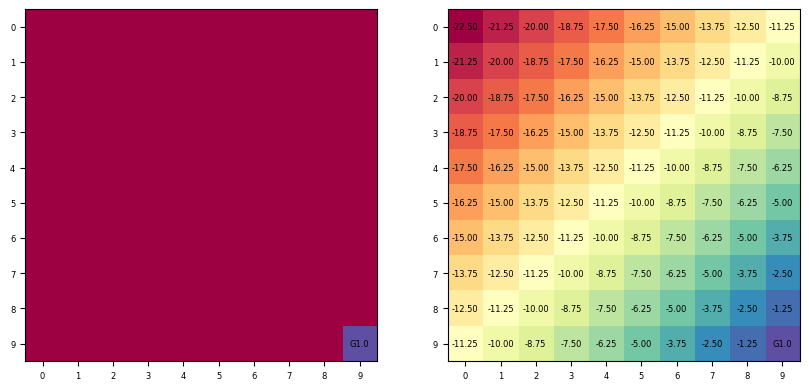

In [10]:
grid_of_good_potentials = np.zeros((Ly,Lx))
for i in range(Lx):
    for j in range(Ly):
        grid_of_good_potentials[j,i] = good_potential([j,i])
        
plot_world_values(russel_World_1, grid_of_good_potentials)

In [11]:
# SARSA learning
sarsa_for_well_shaped_world = SARSA_TDControl_for_GridWorldEnvs(russel_World_1_as_RL_model,
                                                                (Ly, Lx),
                                                                actions,
                                                                n_episodes,
                                                                gamma, epsilon, alpha,
                                                                F=good_shaping_function)

averaged_trajectories_length_for_well_shaped_world = np.zeros(n_episodes)

for _ in range(indipendent_runs):
    sarsa_for_well_shaped_world.all_episodes_update()
    averaged_trajectories_length_for_well_shaped_world += sarsa_for_well_shaped_world.get_trajectories_length()

averaged_trajectories_length_for_well_shaped_world /= (indipendent_runs)


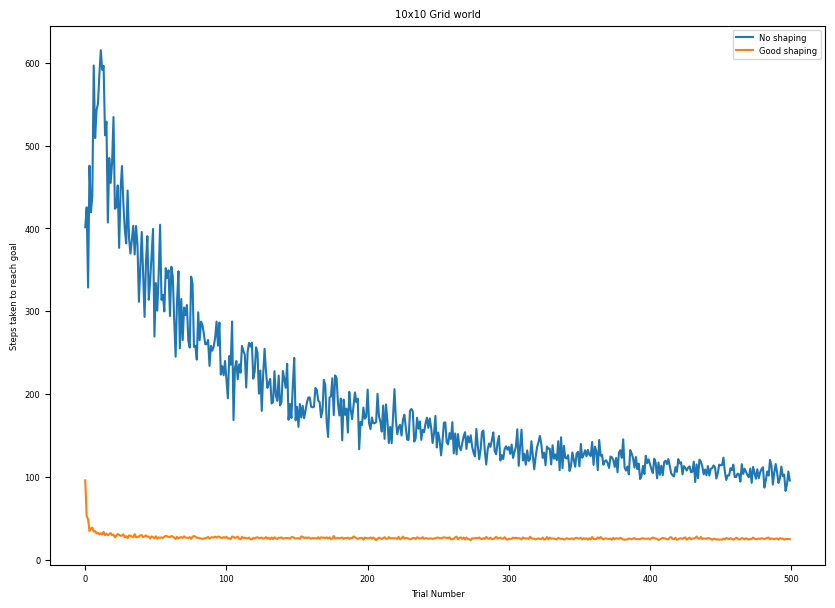

In [12]:
ax.plot(averaged_trajectories_length_for_well_shaped_world,
        label="Good shaping")

ax.legend()

fig


But reward shaping can be used even if our guess for the optimal value is not that good, for example:

$$
\varPhi_1(s) = \frac{1}{2} \varPhi_0(s)
$$

In [13]:
def less_good_potential(s):  # Phi_1(s)
    return 0.5*good_potential(s)

def less_good_shaping_function(s, a, new_s):  # F_1(s,a,s')
    return gamma * less_good_potential(new_s) - less_good_potential(s)


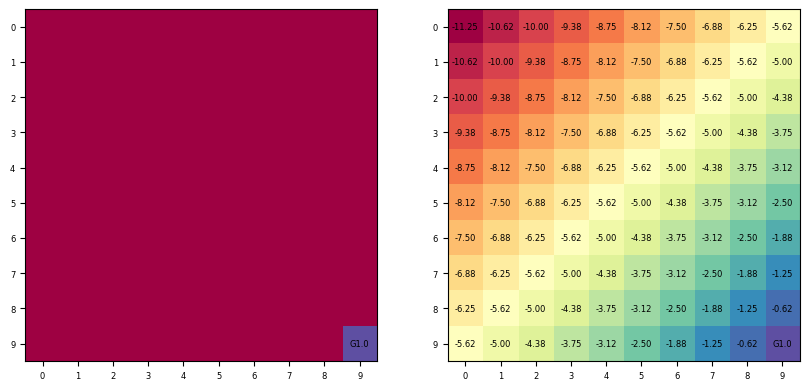

In [14]:
grid_of_less_good_potentials = np.zeros((Ly,Lx))
for i in range(Lx):
    for j in range(Ly):
        grid_of_less_good_potentials[j,i] = less_good_potential([j,i])
        
plot_world_values(russel_World_1, grid_of_less_good_potentials)


In [15]:
# SARSA learning
sarsa_for_less_well_shaped_world = SARSA_TDControl_for_GridWorldEnvs(russel_World_1_as_RL_model,
                                                                (Ly, Lx),
                                                                actions,
                                                                n_episodes,
                                                                gamma, epsilon, alpha,
                                                                F=less_good_shaping_function)


# Learning results averaged over many runs
averaged_trajectories_length_for_less_well_shaped_world = np.zeros(n_episodes)

for _ in range(indipendent_runs):
    sarsa_for_less_well_shaped_world.all_episodes_update()
    averaged_trajectories_length_for_less_well_shaped_world += sarsa_for_less_well_shaped_world.get_trajectories_length()

averaged_trajectories_length_for_less_well_shaped_world /= (indipendent_runs)


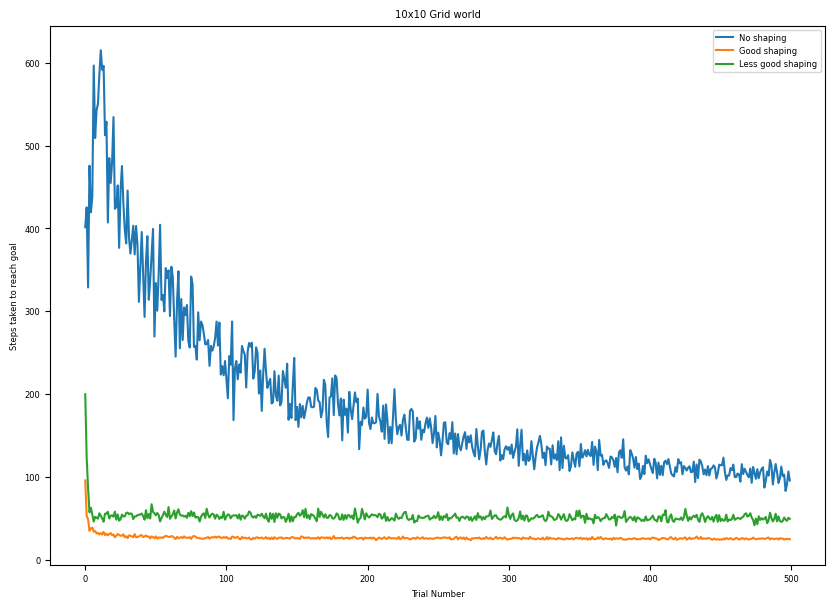

In [16]:
ax.plot(averaged_trajectories_length_for_less_well_shaped_world,
        label="Less good shaping")

ax.legend()

fig


# Equivalence with Q-value initialization

Wiewiora in [Potential-Based Shaping and Q-Value Initialization are Equivalent](https://arxiv.org/pdf/1106.5267.pdf) shown that reward shaping and value initialization are strictly related.

Consider 2 reinforcement learners $L$ and $L'$ with their $Q$-table respectively initialized to $Q(s,a) = Q_0(s,a)$ and $Q'(s,a) = Q_0(s,a) + \varPhi(s)$.  
Consider them to share the same experience $(s,a,r,s')$ during the learning phase, but $L$ will receive an additinal shaping rewards.

Their $Q$-tables, during the learning, will be updated with:
$$
\begin{split}
& Q(s,a) \gets Q(s,a) + \alpha \underbrace{\big( r + F(s,s') + \gamma \max_{a'} Q(s',a') - Q(s,a)\big)}_{\delta Q(s,a)}  \\
& Q'(s,a) \gets Q'(s,a) + \alpha \underbrace{\big( r + \gamma \max_{a'} Q'(s',a') - Q'(s,a)\big)}_{\delta Q'(s,a)}
\end{split}
$$
But since:
$$
\begin{split}
\delta Q'(s,a) & = r + \gamma \max_{a'} Q'(s',a') - Q'(s,a) \\
               & = r + \gamma \max_{a'} \big( Q_0(s',a') + \varPhi(s') + \Delta Q(s',a') \big) - Q_0(s,a) - \varPhi(s) - \Delta Q(s,a)  \\
               & = r + \gamma\varPhi(s') - \varPhi(s) + \gamma \max_{a'} \big( Q_0(s',a') + \Delta Q(s',a') \big) - Q_0(s,a) - \Delta Q(s,a)  \\
               & = r + F(s,s') + \gamma \max_{a'} Q(s',a') + \Delta Q(s',a')  \\
               & = \delta Q(s,a)
\end{split}
$$
both $Q$-tables will be updated by the overall same value $\Delta Q(\cdot) = \sum_t \delta Q(\cdot,a) = \sum_t \delta Q'(\cdot,a) = \Delta Q'(\cdot)$, meaning that, once the learning phase end, $Q$-tables will differ only by an absolute magnitude:
$$
\begin{split}
& Q(s,a) = Q_0(s,a) + \Delta Q(s,a)  \\
& Q'(s,a) = Q_0(s,a) + \varPhi(s) + \Delta Q'(s,a)
\end{split}
$$

Moreover notice that almost all policies used in reinforcement learning are *advantage-based* (they choose an action in a given state with a probability that is determined by the differences of the $Q$-values for that state, not their absolute value), meaning that again $\pi_{M'}^{L} = \pi_{M}^{L'}$.

Of course the initialization of $Q'(s,a)$ will be as good as the choice of the potential $\varPhi(s)$:


In [17]:
Qvalues_good_init = np.zeros( (*russel_World_1.shape, len(actions)) )
Qvalues_less_good_init = np.zeros( (*russel_World_1.shape, len(actions)) )

for sy in range(Ly):
    for sx in range(Lx):
        for a in range(len(actions)):
            Qvalues_good_init[sy, sx, a] = good_potential([sy, sx])
            Qvalues_less_good_init[sy, sx, a] = less_good_potential([sy, sx])


In [18]:
# SARSA learning
sarsa_for_well_Q_initialized_world = SARSA_TDControl_for_GridWorldEnvs(russel_World_1_as_RL_model,
                                                                (Ly, Lx),
                                                                actions,
                                                                n_episodes,
                                                                gamma, epsilon, alpha,
                                                                Qvalues_init=Qvalues_good_init)

sarsa_for_less_well_Q_initialized_world = SARSA_TDControl_for_GridWorldEnvs(russel_World_1_as_RL_model,
                                                                (Ly, Lx),
                                                                actions,
                                                                n_episodes,
                                                                gamma, epsilon, alpha,
                                                                Qvalues_init=Qvalues_less_good_init)


# Learning results averaged over many runs
averaged_trajectories_length_for_well_Q_initialized_world = np.zeros(n_episodes)
averaged_trajectories_length_for_less_well_Q_initialized_world = np.zeros(n_episodes)

for _ in range(indipendent_runs):
    sarsa_for_well_Q_initialized_world.all_episodes_update()
    sarsa_for_less_well_Q_initialized_world.all_episodes_update()
    averaged_trajectories_length_for_well_Q_initialized_world += sarsa_for_well_Q_initialized_world.get_trajectories_length()
    averaged_trajectories_length_for_less_well_Q_initialized_world += sarsa_for_less_well_Q_initialized_world.get_trajectories_length()

averaged_trajectories_length_for_well_Q_initialized_world /= (indipendent_runs)
averaged_trajectories_length_for_less_well_Q_initialized_world /= (indipendent_runs)


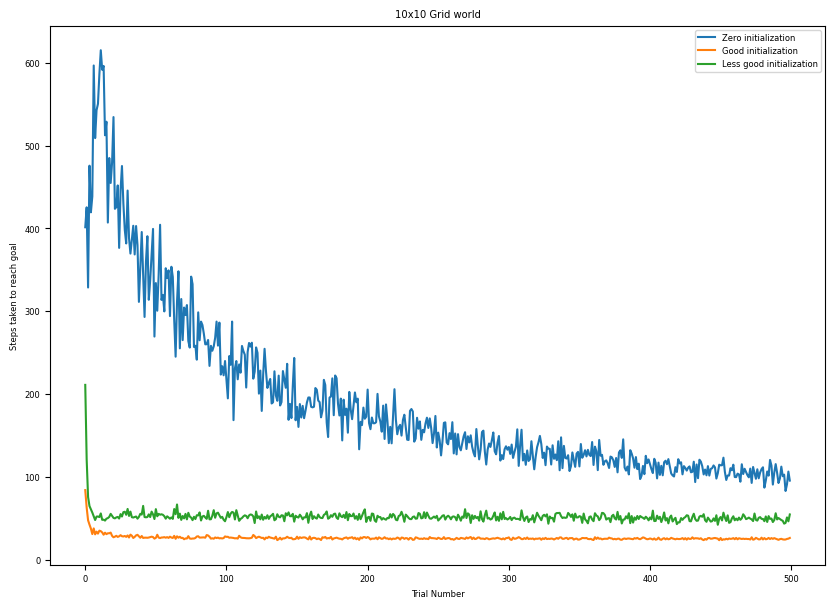

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("Trial Number")
ax.set_ylabel("Steps taken to reach goal")
ax.set_title("10x10 Grid world")

ax.plot(averaged_trajectories_length,
        label="Zero initialization")
ax.plot(averaged_trajectories_length_for_well_Q_initialized_world,
        label="Good initialization")
ax.plot(averaged_trajectories_length_for_less_well_Q_initialized_world,
        label="Less good initialization")

ax.legend()


# Fail of heuristic


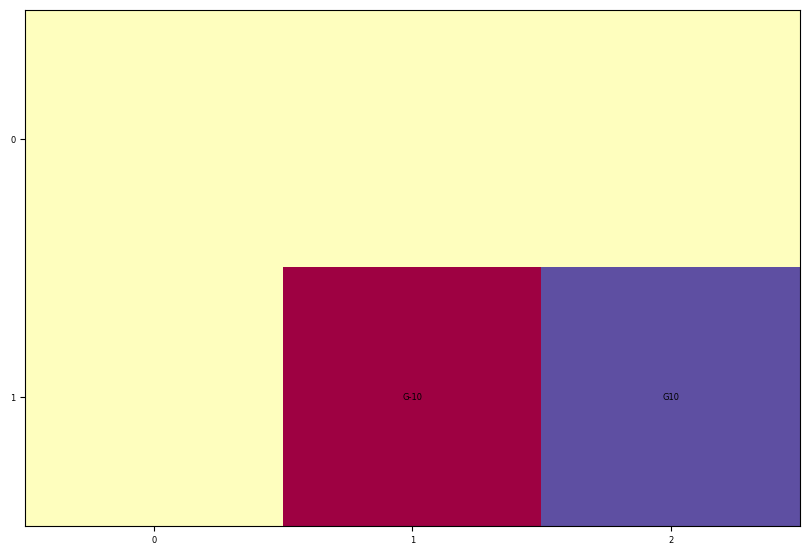

In [20]:
Lx, Ly = 3, 2
N_blocks = 0
starting_tile = [0,0]
goal_tile = [(Ly-1,Lx-1)]

goals = [(1,1), (1,2)]
rewards = [-10, 10]

heuristic_fail_world = new_world(Lx, Ly, N_blocks, goals, rewards)

plot_world(heuristic_fail_world)


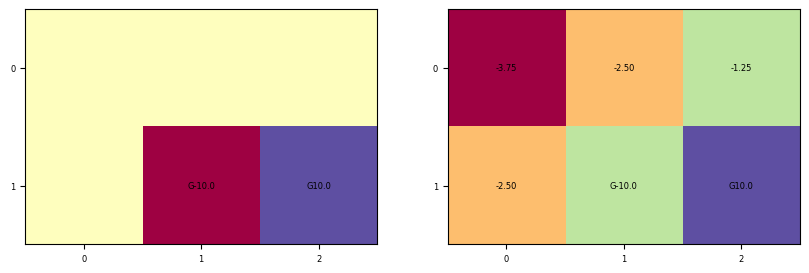

In [21]:
failing_value_initialization = np.zeros((Ly,Lx))
for i in range(Lx):
    for j in range(Ly):
        failing_value_initialization[j,i] = good_potential([j,i])

plot_world_values(heuristic_fail_world, failing_value_initialization)


Heuristic is nudging us in the wrong direction
$$
\begin{split}
& Q_0=\big( (1,0), \, Up \big ) = -3.75  \\
& Q_0=\big( (1,0), \, Right \big ) = -1.25  \\
& Q_0=\big( (1,0), \, Down \big ) = -2.50  \\
& Q_0=\big( (1,0), \, Left \big ) = -2.50
\end{split}
$$
Nevertheless, by stepping into the bad tile, agent will learn from the received punishment and will update its quality estimation to possibly circumnavigate the bad tile

---

Resources:

- [Emanuele Panizon; Lab Lectures 2021](https://github.com/epanizon/Lectures2021)
- [Wiewora; Potential-Based Shaping and Q-Value Initialization are Equivalent](https://arxiv.org/pdf/1106.5267.pdf)
- [Ng. et al.; Policy invariance under reward transformations: Theory and application to reward shaping](https://people.eecs.berkeley.edu/~russell/papers/icml99-shaping.pdf)
- [Tim Miller; Introduction to Reinforcement Learning](https://gibberblot.github.io/rl-notes/intro.html#the-book)